In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random

!pip install keras-tqdm
import keras
from tqdm import tqdm_notebook
from random import shuffle
import shutil
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import Callback
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.metrics import confusion_matrix
import itertools

import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [28]:
!git clone http://github.com/rodolfojbrandao/PHD
%cd PHD
DAT=pd.read_csv("DadosImagem.csv")
y_train=DAT.sample(frac=0.8,random_state=1).copy()
y_test=DAT.drop(y_train.index).copy()

Cloning into 'PHD'...
remote: Enumerating objects: 558, done.
remote: Counting objects: 100% (558/558), done.
remote: Compressing objects: 100% (538/538), done.
remote: Total 4805 (delta 28), reused 547 (delta 20), pack-reused 4247
Receiving objects: 100% (4805/4805), 63.87 MiB | 22.47 MiB/s, done.
Resolving deltas: 100% (383/383), done.
Checking out files: 100% (4548/4548), done.
/content/PHD/PHD/PHD


In [29]:
print("Path at terminal when executing this file")
print(os.getcwd() + "\n")

Path at terminal when executing this file
/content/PHD/PHD/PHD



In [0]:
import zipfile
file_name = zipfile.ZipFile('DadosImagem.zip', 'r')
file_name.extractall() 

In [0]:
# all images are load in variable x...
FILE='DadosImagem.zip'
img_name=[]
x=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        x.append(cv2.imread(name))

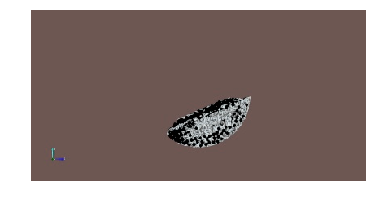

In [32]:

img=plt.imread(img_name[300])
plt.axis("off")
plt.imshow(x[300])


In [0]:
x_train, x_test = train_test_split(x, test_size=0.2, random_state=1)

In [34]:
type(x_train)

list

In [0]:
import numpy as np
x_train=np.array(x_train)
x_test=np.array(x_test)

In [36]:
print(len(x))

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

489


In [37]:
print(len(DAT))


489


In [41]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 32
training_set = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_set = val_datagen.flow(x_test,y_test, batch_size=batch_size)

classifier.fit_generator(training_set,
                         steps_per_epoch =10,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 50)

ValueError: ignored